# SAMSUNG-KAIST AI expert program practical code session
### 2019 / 07 / 29
Copyright (C) 2019 Kangyeol Kim kky1994@korea.ac.kr

In [1]:
import os
import torch
import argparse
import numpy as np
import torchvision
import torchvision.models as models
import matplotlib.pyplot as plt 
from matplotlib.pyplot import imshow
%matplotlib inline

## [1] 간단한 데이터 다운로드를 위한 pytorch API의 활용

### MNIST 데이터
- 60000 training images 
- 10000 validation images 
- 10 classes = [0,1,2,3,4,5,6,7,8,9]

In [45]:
train_d = torchvision.datasets.MNIST('./data', train=True, download=True, transform=torchvision.transforms.ToTensor())
test_d = torchvision.datasets.MNIST('./data', train=False, transform=torchvision.transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(train_d, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_d, batch_size=32, shuffle=False)

In [8]:
print('총 학습 데이터 개수 : %d, 총 테스트 데이터 개수 : %d'%(len(train_d), len(test_d))) 

총 학습 데이터 개수 : 60000, 총 테스트 데이터 개수 : 10000


In [11]:
print('[배치 크기 32 기준] 학습 데이터 배치 개수 : %d, 테스트 데이터 배치 개수 : %d'%(len(train_loader), len(test_loader))) 

[배치 크기 32 기준] 학습 데이터 배치 개수 : 1875, 테스트 데이터 배치 개수 : 313


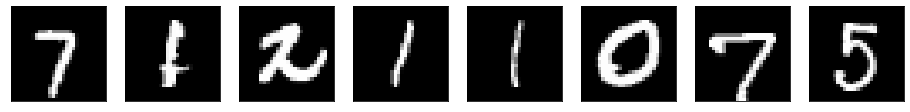

In [54]:
def show_mnist():
    for images, _ in train_loader:
        images_to_show = images.squeeze().numpy()
        fig=plt.figure(figsize=(16, 2))
        for i in range(8):
            fig.add_subplot(1, 8, i+1)
            plt.imshow(images_to_show[i], cmap='gray')
            plt.xticks([])
            plt.yticks([])    
        fig.show()
        break
show_mnist()

### CIFAR-10 데이터
- 50000 training images 
- 10000 validation images 
- 10 classes = [airplane, car, truck, frog, ...]
- for more info, https://www.cs.toronto.edu/~kriz/cifar.html 



In [12]:
train_d = torchvision.datasets.CIFAR10('./data', train=True, download=True, transform=torchvision.transforms.ToTensor())
test_d = torchvision.datasets.CIFAR10('./data', train=False, transform=torchvision.transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(train_d, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_d, batch_size=32, shuffle=False)

100.0%

In [ ]:
print('총 학습 데이터 개수 : %d, 총 테스트 데이터 개수 : %d'%(len(train_d), len(test_d))) 

In [ ]:
print('[배치 크기 32 기준] 학습 데이터 배치 개수 : %d, 테스트 데이터 배치 개수 : %d'%(len(train_loader), len(test_loader))) 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


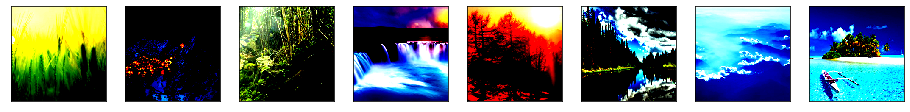

In [138]:
def show_image(loader, fig_num=8):
    for images, _ in loader:
        images_to_show = images.numpy().transpose((0,2,3,1))
        fig=plt.figure(figsize=(16, 5))
        for i in range(fig_num):
            fig.add_subplot(1, fig_num, i+1)
            plt.imshow(images_to_show[i])
            plt.xticks([])
            plt.yticks([])    
        fig.show()
        break
show_image(train_loader)

## [2] Pytorch ImageFolder를 통해 손쉽게 데이터로더 만들기

In [55]:
train_d = torchvision.datasets.ImageFolder('./data/minidata/train',transform=torchvision.transforms.ToTensor())                        
test_d = torchvision.datasets.ImageFolder('./data/minidata/test',transform=torchvision.transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(train_d, batch_size=10, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_d, batch_size=10, shuffle=False)

In [56]:
print('총 학습 데이터 개수 : %d, 총 테스트 데이터 개수 : %d'%(len(train_d), len(test_d))) 

총 학습 데이터 개수 : 10, 총 테스트 데이터 개수 : 2


In [57]:
print('[배치 크기 32 기준] 학습 데이터 배치 개수 : %d, 테스트 데이터 배치 개수 : %d'%(len(train_loader), len(test_loader))) 

[배치 크기 32 기준] 학습 데이터 배치 개수 : 1, 테스트 데이터 배치 개수 : 1


In [62]:
# 에러가 예측됩니다. 사진 사이즈가 다양하기 때문입니다.
for images, _ in train_loader:
    print(images)
    break

RuntimeError: invalid argument 0: Sizes of tensors must match except in dimension 0. Got 422 and 426 in dimension 2 at /opt/conda/conda-bld/pytorch_1556653099582/work/aten/src/TH/generic/THTensor.cpp:711

In [93]:
# 서로 다른 사이즈의 이미지를 받아오기 위해서는 전처리를 해줘야 합니다.
# 많은 이미지를 가지고 있다고 할 때 이것들을 일괄적으로 해결해주는 것이 쉽지 않습니다.
# transforms함수는 이를 한방에 처리해줍니다.
transform=torchvision.transforms.Compose([
                              torchvision.transforms.Resize((224, 224)),
                              torchvision.transforms.ToTensor(),                                           
                              ])  
                            
train_d = torchvision.datasets.ImageFolder('./data/minidata/train',transform=transform)                       
train_loader = torch.utils.data.DataLoader(train_d, batch_size=10, shuffle=False)

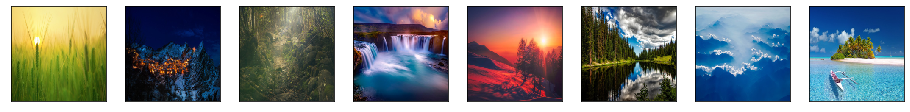

In [95]:
show_image(train_loader)

In [97]:
# 큰 사진의 경우 이를 cropping해서 사용한다면 데이터 증대의 효과를 누릴 수 있습니다.
transform=torchvision.transforms.Compose([
                              torchvision.transforms.RandomResizedCrop((224, 224)),
                              torchvision.transforms.ToTensor(),                                           
                              ])  
                            
train_d = torchvision.datasets.ImageFolder('./data/minidata/train',transform=transform)                       
train_loader = torch.utils.data.DataLoader(train_d, batch_size=10, shuffle=False)

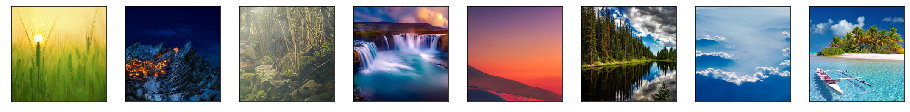

In [98]:
show_image(train_loader)

In [106]:
# 풍경 사진의 경우에는 어색할 수 있으나, 자연의 다양한 사진은 flipping이나 rotation을 해도 어색하지 않으며, 
#이 또한 데이터 증대의 효과를 가집니다. 
transform=torchvision.transforms.Compose([
                              torchvision.transforms.RandomResizedCrop((224, 224)),
                              torchvision.transforms.RandomRotation((-180, 180)),
                              torchvision.transforms.RandomHorizontalFlip(),
                              torchvision.transforms.RandomVerticalFlip(),
                              torchvision.transforms.ToTensor(),                                
                              ])  
                            
train_d = torchvision.datasets.ImageFolder('./data/minidata/train',transform=transform)                       
train_loader = torch.utils.data.DataLoader(train_d, batch_size=10, shuffle=False)

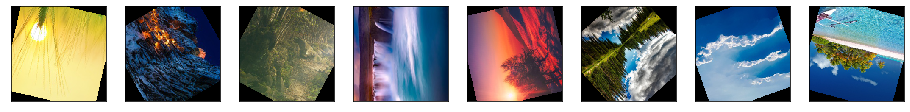

In [115]:
show_image(train_loader)

In [116]:
# 한 가지 이미지 데이터를 다룰 때 주의할 점: normalize는 필수!!
# 하나의 사진 데이터가 가지는 평균을 0으로, 표준편차를 1로 맞춰줌으로써 더욱 generalizable한 성능을 기대합니다 
transform=torchvision.transforms.Compose([
                              torchvision.transforms.RandomResizedCrop((224, 224)),
                              torchvision.transforms.ToTensor(),                   
                              ])  
                            
train_d = torchvision.datasets.ImageFolder('./data/minidata/train',transform=transform)                       
train_loader = torch.utils.data.DataLoader(train_d, batch_size=10, shuffle=False)

In [131]:
# 데이터가 적기에 img 자체가 모든 학습 데이터를 가지고 있습니다. 여기서 평균과 표준편차을 구해줍니다.
for img,_ in train_loader:
    ave = torch.stack([img[:,0].mean(),img[:,1].mean(),img[:,2].mean()])
    standard = torch.stack([img[:,0].std(),img[:,1].std(),img[:,2].std()])
print(ave.tolist())
print(standard.tolist())

[0.4449639320373535, 0.4280477464199066, 0.41530564427375793]
[0.3109997510910034, 0.2500097453594208, 0.2761208117008209]


In [133]:
# 구해준 평균과 표준편차를 사용하여 이미지를 normalize해줍니다.
transform=torchvision.transforms.Compose([
                              torchvision.transforms.RandomResizedCrop((224, 224)),
                              torchvision.transforms.ToTensor(),
                              torchvision.transforms.Normalize(mean=ave.tolist(),std=standard.tolist())

                              ])  
                            
train_d = torchvision.datasets.ImageFolder('./data/minidata/train',transform=transform)                       
train_loader = torch.utils.data.DataLoader(train_d, batch_size=10, shuffle=False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


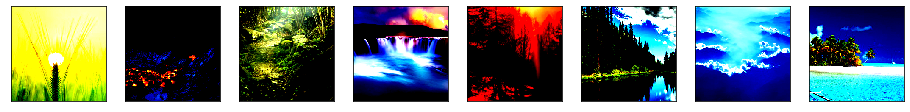

In [134]:
# 사진의 범위가 안 맞기에 색이 변색되어보이고 에러 문자가 뜹니다. 제대로 프린트해주기 위해서는
# 사진을 다시 표준편차를 곱하고 평균을 더하는 작업을 해줘야 합니다.
show_image(train_loader)

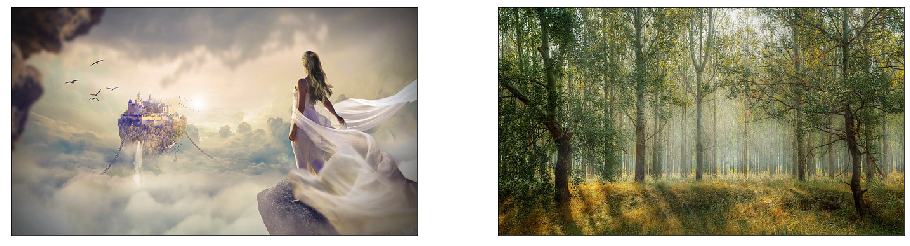

In [139]:
show_image(test_loader, fig_num=2)

## [3] Pytorch API를 활용한 뉴럴넷 모델 간단히 만들어보고, 커스텀 사진 클래스 예측하기.

#### 지원하는 모델들
- AlexNet
- VGG
- ResNet
- SqueezeNet
- DenseNet
- Inception v3
- GoogLeNet
- ShuffleNet v2
- MobileNet v2
- ResNet

In [209]:
# 간단한 VGG 네트워크를 만들어 봅니다.
vgg_model=torchvision.models.vgg11(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg11-bbd30ac9.pth" to /home/kangyeol/.cache/torch/checkpoints/vgg11-bbd30ac9.pth
4.6%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

11.6%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

19.0%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_ra

In [149]:
vgg_model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (16): Conv2d(512, 512, kern

In [143]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
count_parameters(vgg_model)

132863336

In [211]:
import skimage
cat_img=skimage.io.imread("imgs/cat.jpg")
cat_img

Array([[[120, 128, 141],
        [124, 132, 145],
        [129, 137, 150],
        ...,
        [136, 116,  91],
        [137, 117,  92],
        [138, 118,  93]],

       [[127, 135, 148],
        [128, 136, 149],
        [131, 139, 152],
        ...,
        [133, 111,  87],
        [135, 113,  89],
        [137, 115,  91]],

       [[130, 138, 151],
        [129, 137, 148],
        [128, 136, 147],
        ...,
        [135, 113,  89],
        [138, 116,  92],
        [140, 118,  94]],

       ...,

       [[ 65,  46,  68],
        [ 63,  44,  64],
        [ 62,  40,  61],
        ...,
        [ 22,  30,  51],
        [ 20,  28,  49],
        [ 18,  26,  47]],

       [[ 62,  43,  63],
        [ 61,  42,  62],
        [ 63,  41,  62],
        ...,
        [ 20,  28,  47],
        [ 18,  26,  45],
        [ 16,  24,  43]],

       [[ 61,  42,  62],
        [ 62,  43,  63],
        [ 65,  43,  64],
        ...,
        [ 21,  29,  48],
        [ 19,  27,  46],
        [ 17,  25,  44]]

In [212]:
# 255로 나눠준 후, normalize를 해줍니다 (아까 구해놓은 ave와 standard를 사용해봅니다!)
torch_img=(torch.from_numpy(cat_img/255).float() - ave.unsqueeze(0).unsqueeze(0))/standard.unsqueeze(0).unsqueeze(0)
torch_img.size() # 현재 이미지 크기입니다.

torch.Size([1470, 980, 3])

In [213]:
torch_img=torch_img.permute(2,0,1).unsqueeze(0) # 모델에 적합한 인풋 형태로 만들어줍니다 

In [214]:
torch_img.size()

torch.Size([1, 3, 1470, 980])

In [215]:
class_prediction=vgg_model(torch_img)

In [216]:
idx=int(class_prediction.max(1)[1])

In [217]:
# 미리 넣어둔 이미지넷 결과를 받아옵니다
f = open('./data/imagenet_idx', 'r')
idx_dict = eval(f.read())
f.close()

Prediction is : Persian cat


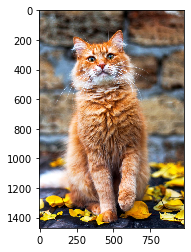

In [220]:
#결과를 감상합니다
print('Prediction is :', idx_dict[idx])
plt.imshow(cat_img)

#### 하나만 더 해볼까요?

(389, 650, 3)


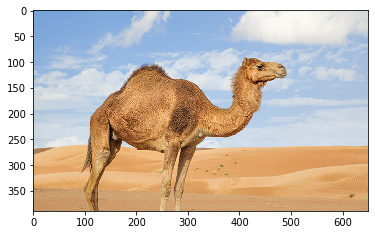

In [223]:
# 낙타 사진입니다. 제대로 분류할까요!?
cam_img=skimage.io.imread("imgs/camel.jpg")
print(cam_img.shape)
plt.imshow(cam_img)

Prediction is : Arabian camel, dromedary, Camelus dromedarius


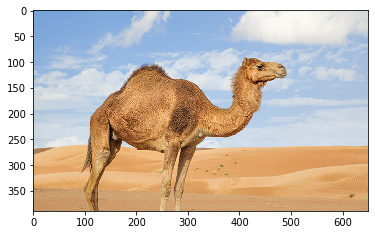

In [224]:
# 255로 나눠준 후, normalize를 해줍니다 (아까 구해놓은 ave와 standard를 사용해봅니다!)
torch_img=(torch.from_numpy(cam_img/255).float() - ave.unsqueeze(0).unsqueeze(0))/standard.unsqueeze(0).unsqueeze(0)
torch_img.size() # 현재 이미지 크기입니다.

torch_img=torch_img.permute(2,0,1).unsqueeze(0) # 모델에 적합한 인풋 형태로 만들어줍니다 

class_prediction=vgg_model(torch_img)

idx=int(class_prediction.max(1)[1])

#결과를 감상합니다
print('Prediction is :', idx_dict[idx])
plt.imshow(cam_img)

#### 하는 김에 하나만 더!

(419, 743, 3)
Prediction is : tile roof


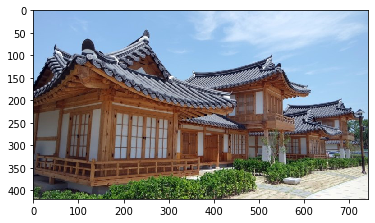

In [225]:
# 한옥 사진입니다. 제대로 분류할까요!?
house_img=skimage.io.imread("imgs/house.jpg")
print(house_img.shape)
plt.imshow(house_img)

# 255로 나눠준 후, normalize를 해줍니다 (아까 구해놓은 ave와 standard를 사용해봅니다!)
torch_img=(torch.from_numpy(house_img/255).float() - ave.unsqueeze(0).unsqueeze(0))/standard.unsqueeze(0).unsqueeze(0)
torch_img.size() # 현재 이미지 크기입니다.

torch_img=torch_img.permute(2,0,1).unsqueeze(0) # 모델에 적합한 인풋 형태로 만들어줍니다 

class_prediction=vgg_model(torch_img)

idx=int(class_prediction.max(1)[1])

#결과를 감상합니다
print('Prediction is :', idx_dict[idx])
plt.imshow(house_img)